In [2]:
import pandas as pd
import numpy as np

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")

In [4]:
crop.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.duplicated().sum()

0

In [9]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

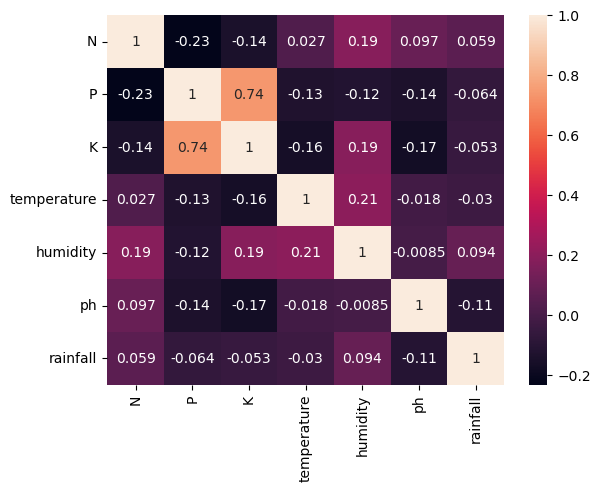

In [14]:
sns.heatmap(crop.iloc[:,:-1].corr(),annot=True)

<Axes: xlabel='rainfall', ylabel='Count'>

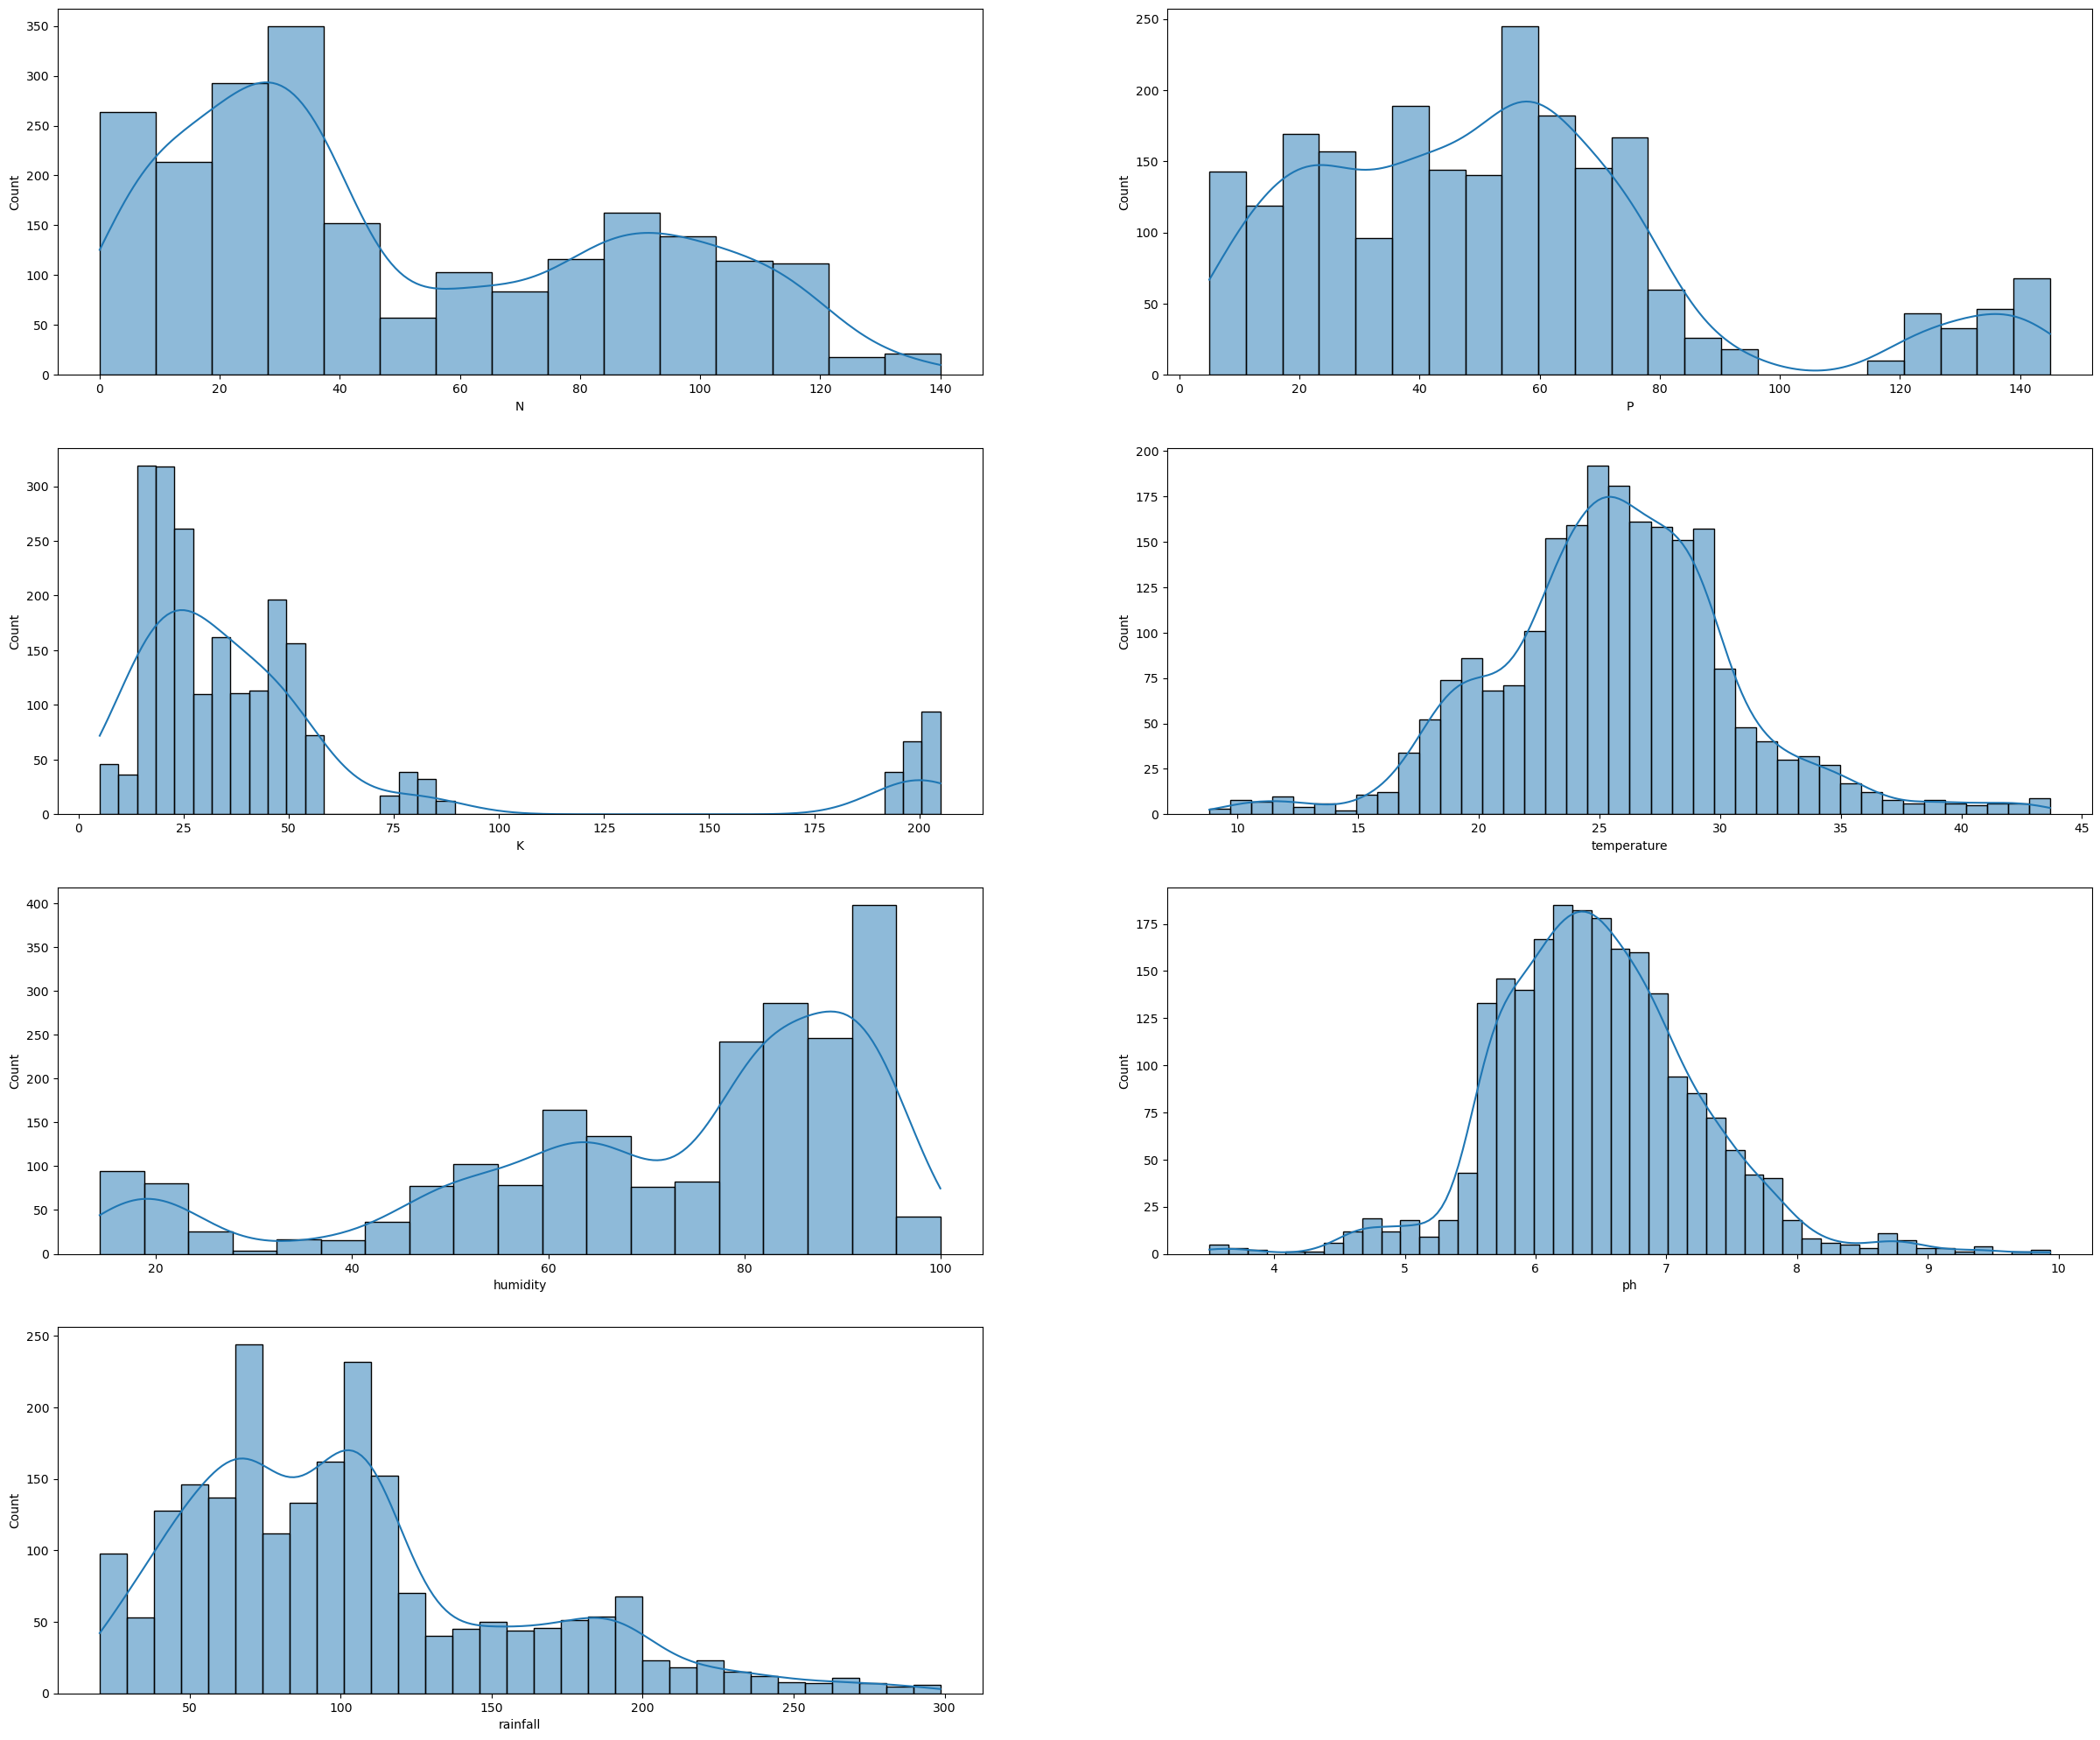

In [15]:
plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.histplot(crop['N'],kde=True)

plt.subplot(4,2,2)
sns.histplot(crop['P'],kde=True)

plt.subplot(4,2,3)
sns.histplot(crop['K'],kde=True)

plt.subplot(4,2,4)
sns.histplot(crop['temperature'],kde=True)

plt.subplot(4,2,5)
sns.histplot(crop['humidity'],kde=True)

plt.subplot(4,2,6)
sns.histplot(crop['ph'],kde=True)

plt.subplot(4,2,7)
sns.histplot(crop['rainfall'],kde=True)

<Axes: >

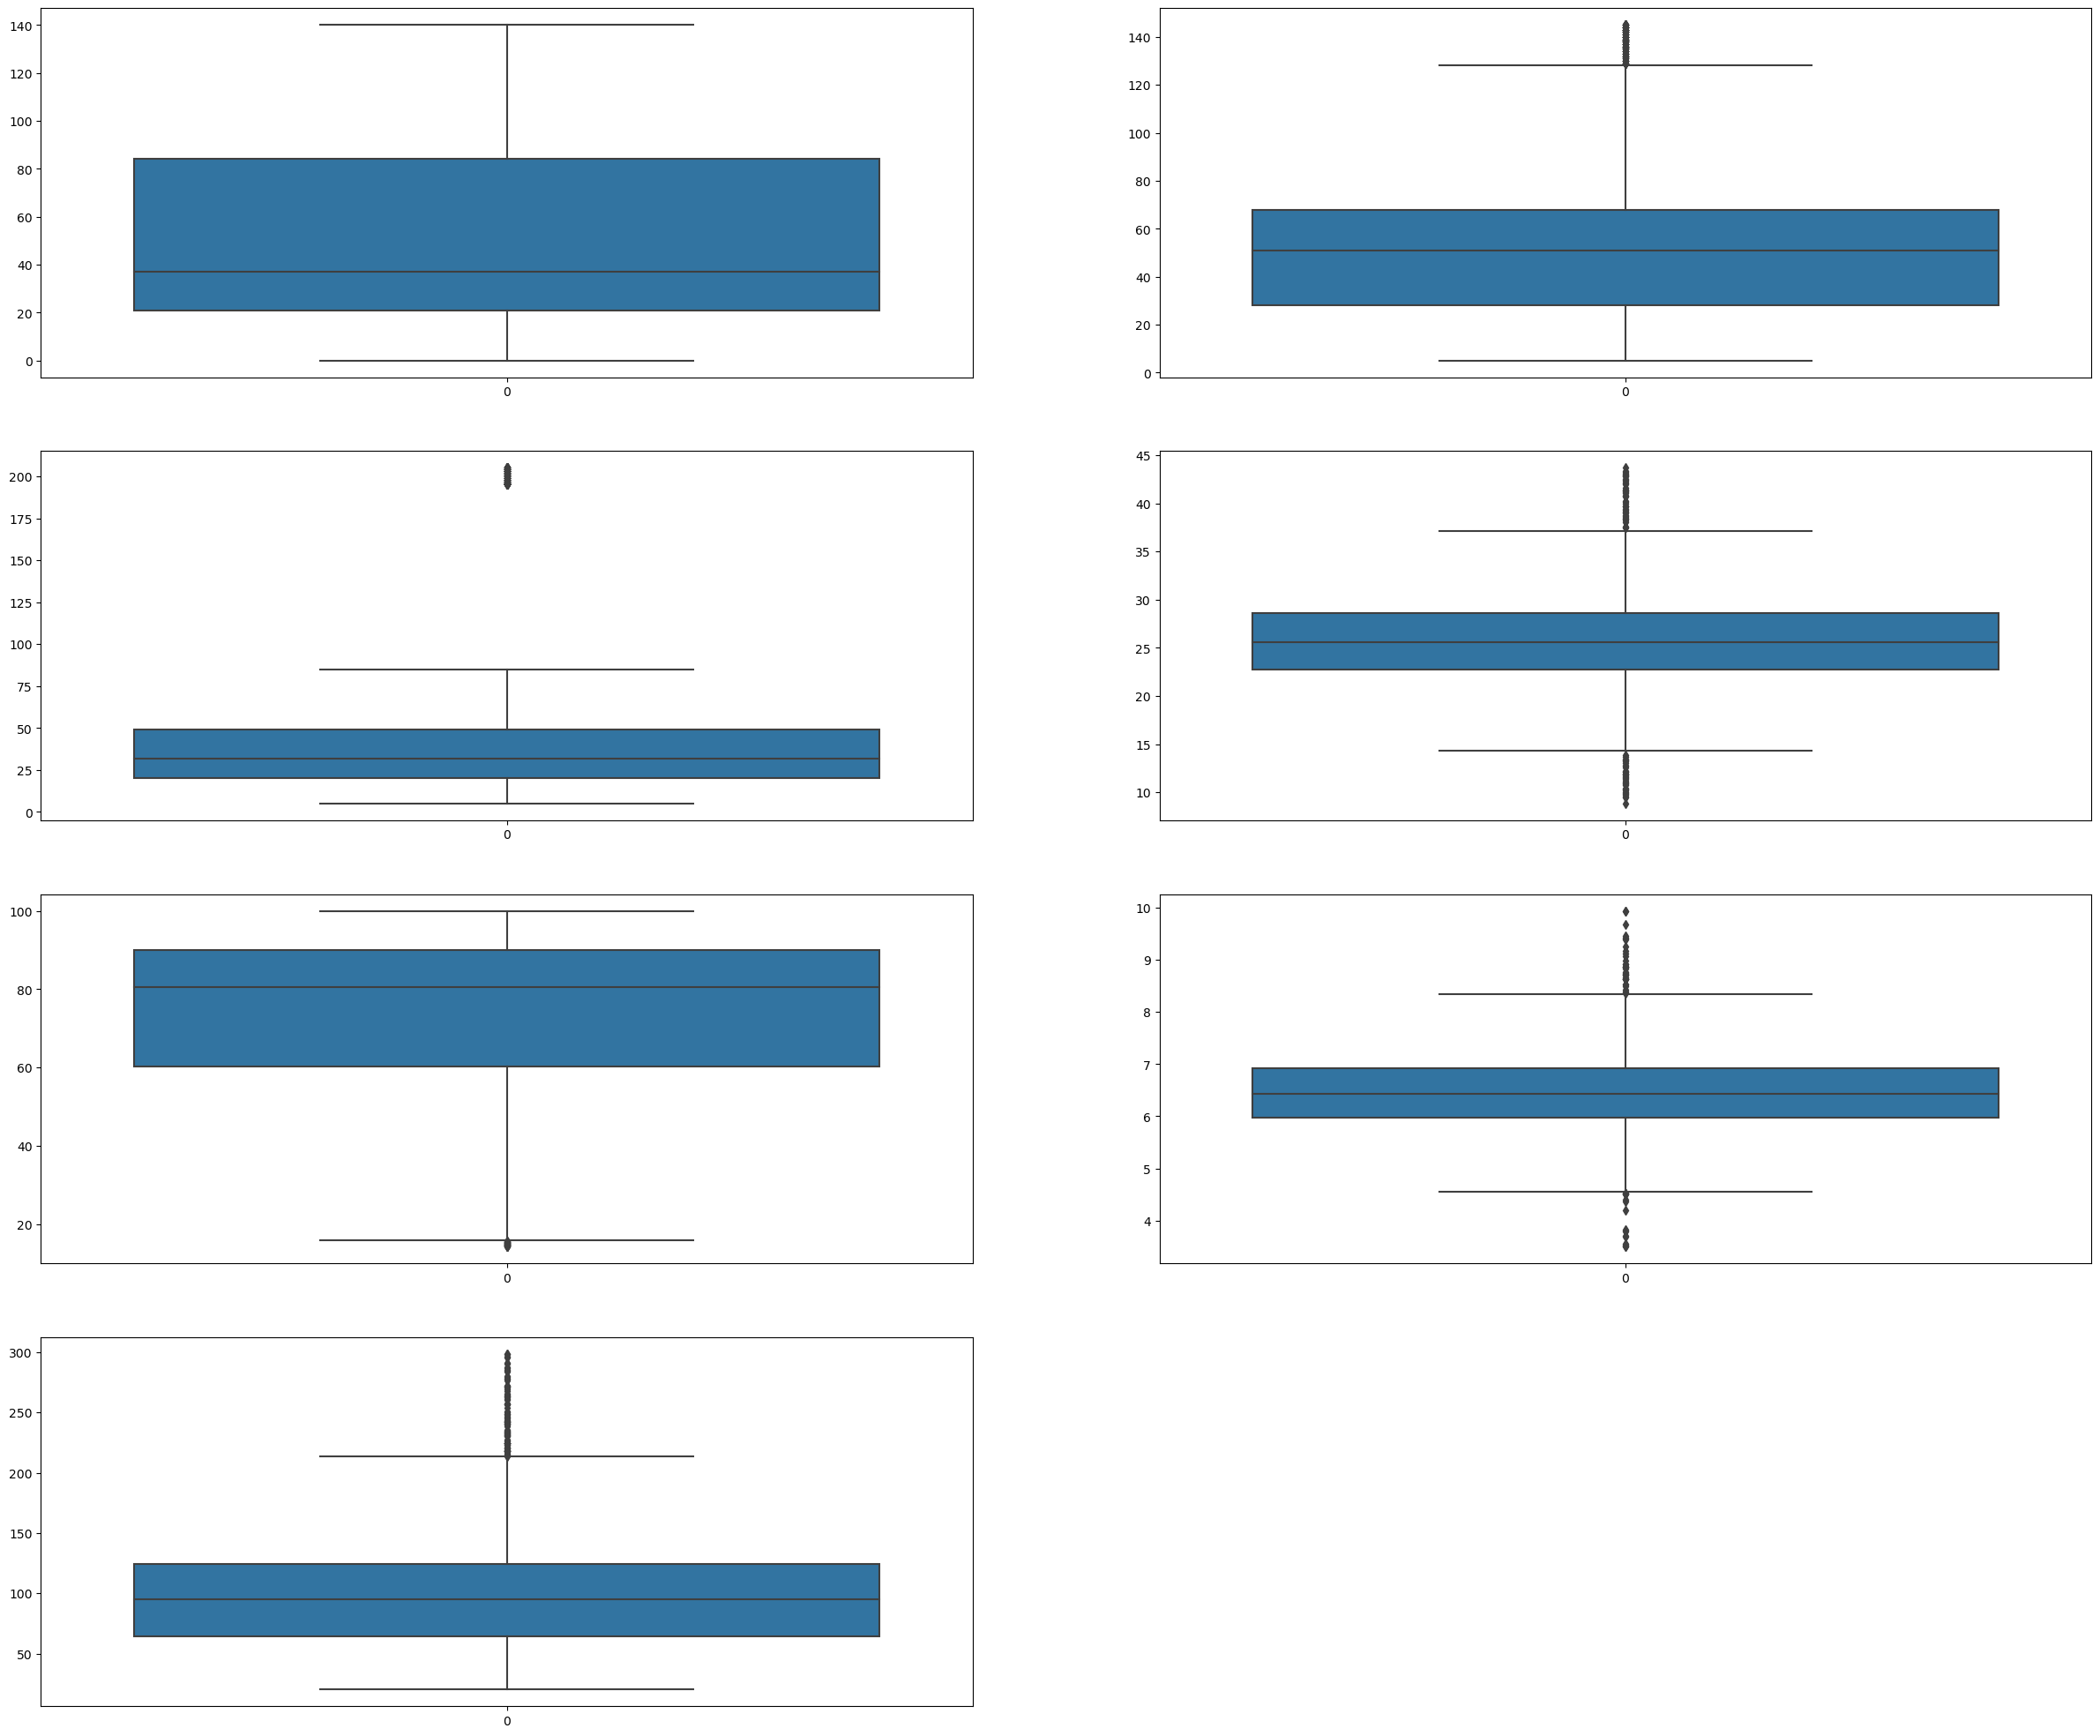

In [16]:
plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.boxplot(crop['N'])

plt.subplot(4,2,2)
sns.boxplot(crop['P'])

plt.subplot(4,2,3)
sns.boxplot(crop['K'])

plt.subplot(4,2,4)
sns.boxplot(crop['temperature'])

plt.subplot(4,2,5)
sns.boxplot(crop['humidity'])

plt.subplot(4,2,6)
sns.boxplot(crop['ph'])

plt.subplot(4,2,7)
sns.boxplot(crop['rainfall'])

In [17]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [34]:
percentile25 = crop['humidity'].quantile(0.25)
percentile75 = crop['humidity'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
crop[crop['humidity'] < lower_limit].size

240

In [36]:
new_df = crop[crop['humidity'] >= lower_limit]

In [37]:
upper_limit1 = new_df['rainfall'].quantile(0.98)
lower_limit1 = new_df['rainfall'].quantile(0.02)

In [38]:
new_df =new_df[(new_df['rainfall'] <= upper_limit1) & (new_df['rainfall'] >= lower_limit1)]

In [39]:
upper_limit2 = new_df['ph'].quantile(0.97)
lower_limit2 = new_df['ph'].quantile(0.03)

In [40]:
new_df = new_df[(new_df['ph'] <= upper_limit2) & (new_df['ph'] >= lower_limit2)]

In [41]:
upper_limit3 = new_df['temperature'].quantile(0.98)
lower_limit3 = new_df['temperature'].quantile(0.02)

In [42]:
new_df = new_df[(new_df['temperature'] <= upper_limit3) & (new_df['temperature'] >= lower_limit3)]

In [43]:
upper_limit4 = new_df['P'].quantile(0.97)
lower_limit4 = new_df['P'].quantile(0.01)

In [44]:
new_df = new_df[(new_df['P'] <= upper_limit4) & (new_df['P'] >= lower_limit4)]

<Axes: >

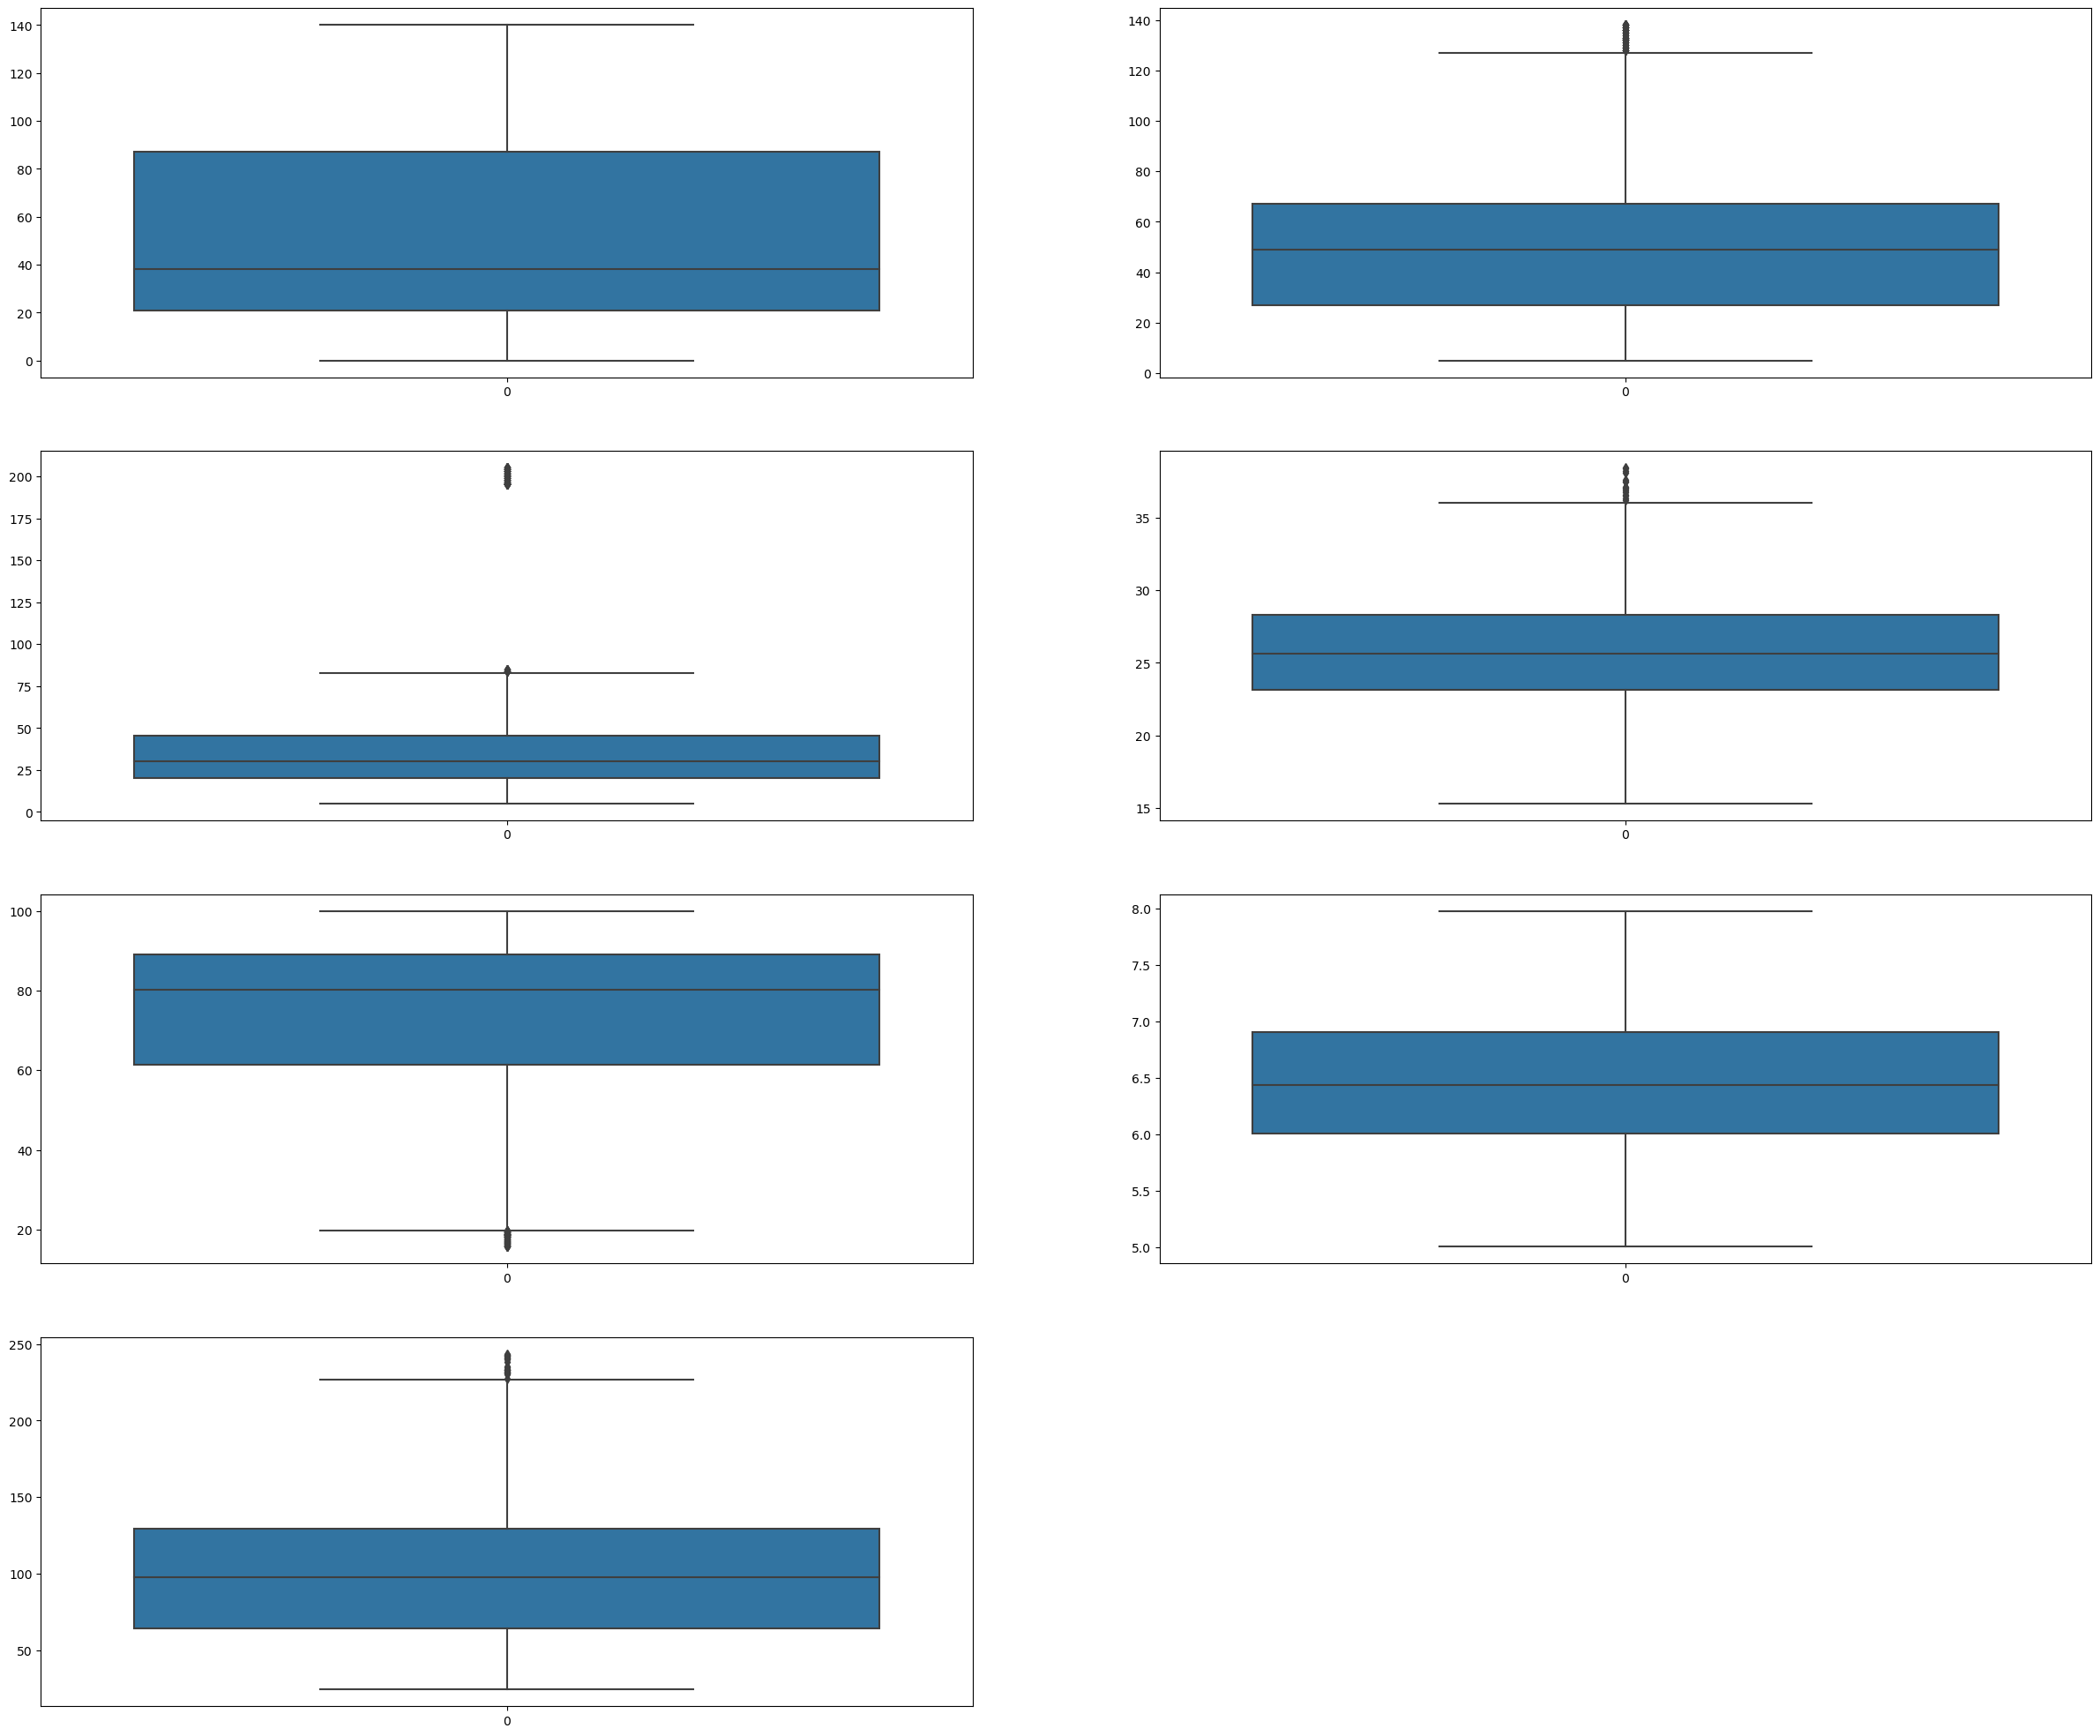

In [45]:
plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.boxplot(new_df['N'])

plt.subplot(4,2,2)
sns.boxplot(new_df['P'])

plt.subplot(4,2,3)
sns.boxplot(new_df['K'])

plt.subplot(4,2,4)
sns.boxplot(new_df['temperature'])

plt.subplot(4,2,5)
sns.boxplot(new_df['humidity'])

plt.subplot(4,2,6)
sns.boxplot(new_df['ph'])

plt.subplot(4,2,7)
sns.boxplot(new_df['rainfall'])

In [46]:
crop.shape, new_df.shape

((2200, 8), (1819, 8))

In [47]:
X_new=new_df.drop('label', axis = 1)
y_new =new_df['label']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state=42)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    
}

In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9615384615384616
SVC model with accuracy: 0.9835164835164835
DecisionTreeClassifier model with accuracy: 0.9835164835164835
RandomForestClassifier model with accuracy: 0.9917582417582418


In [54]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9917582417582418

In [55]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [56]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [57]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))